In [1]:
import pandas as pd
import datetime
import sys
sys.path.append('../../utils/')

import openmeteo_loader as oml
import calculator_utils as utils
#from openmeteo_loader import *

In [2]:
#lat: str = '', lon: str = '', start_dt: str = '',  end_dt: str = '',tz: str = 'GMT'
oml_df = oml.call_openmeteo_archive(lat = '44.2' , lon ='-119.6' , start_dt = '2007-04-27', end_dt = '2007-05-01')


Coordinates 44.18277359008789°E -119.4969482421875°N
Elevation 1465.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


In [3]:

oml_df['dt'] = oml_df['date'].astype('int64')//1e9

In [4]:
oml_df['dt_v2'] = [int(item.timestamp()) for item in oml_df['date']]

In [5]:
onecall_hist_df = pd.read_csv('../nov_13_2023/demo.csv')
onecall_hist_df['temp_c'] = (onecall_hist_df['temp'] - 273.15)

In [6]:
merged_df = pd.merge(oml_df, onecall_hist_df, on='dt', suffixes=('_oml', '_onecall'))

diff_abs mean: 1.3778801260948206
diff_abs variance: 0.7078539157891244
percent_diff_c1 mean: 21.705755054226817
percent_diff_c1 variance: 1253.8285947741756
percent_diff_c2 mean: 15.034804925788869
percent_diff_c2 variance: 221.9643291373754


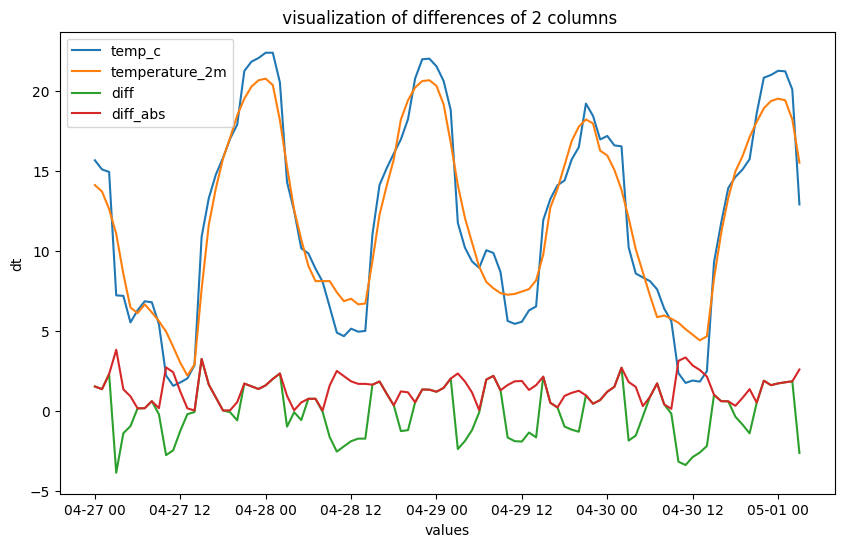

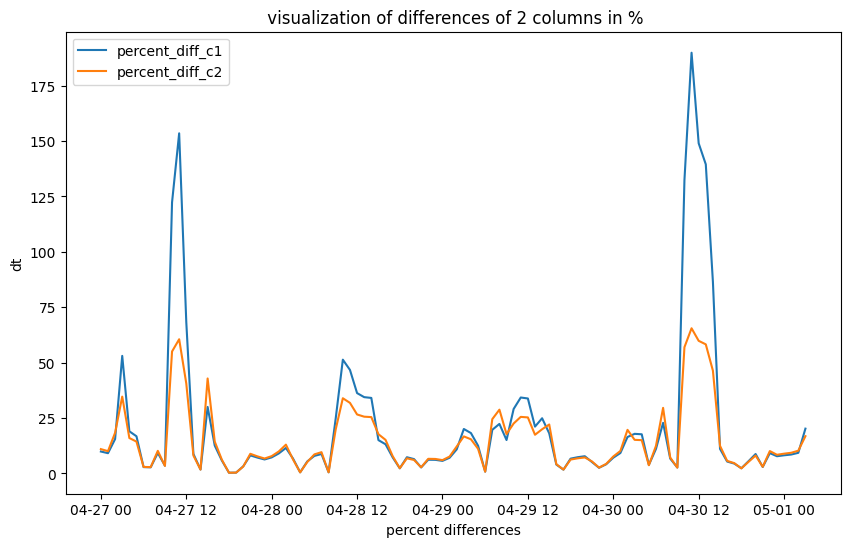

In [7]:
test_df = utils.df_vis_diff(df = merged_df, column1 = 'temp_c', column2 = 'temperature_2m')

diff_abs mean: 0.916600019749252
diff_abs variance: 0.5488485319886527
percent_diff_c1 mean: 23.29520348464892
percent_diff_c1 variance: 17397.29759101793
percent_diff_c2 mean: 64.99478709760052
percent_diff_c2 variance: 87982.55197890828


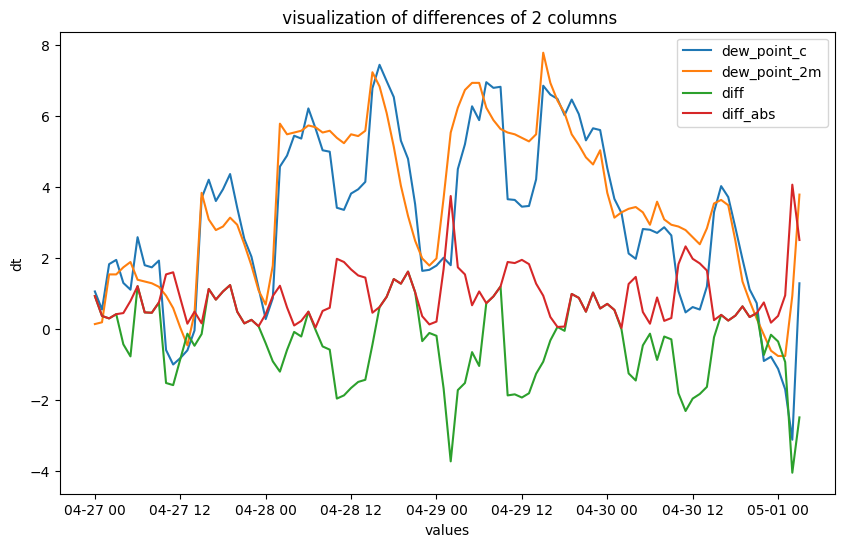

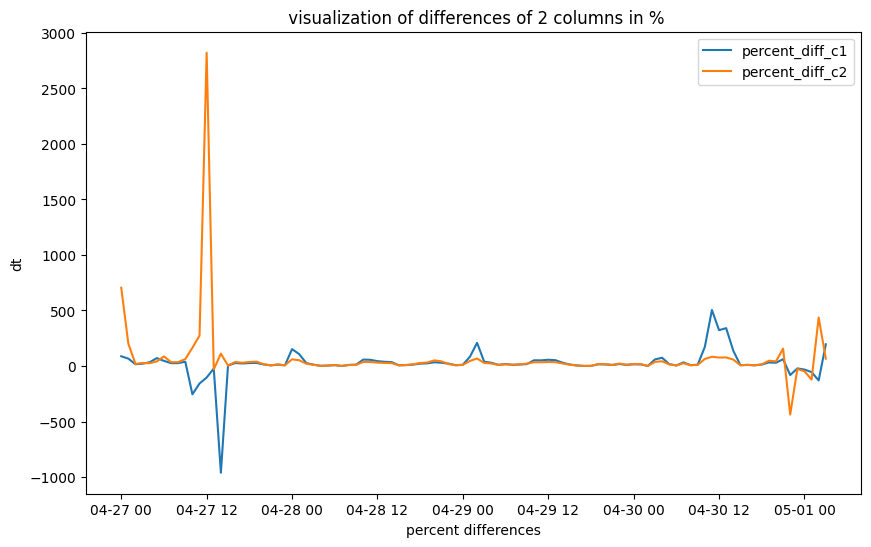

,dt,dew_point_c,dew_point_2m,diff,diff_abs,percent_diff_c1,percent_diff_c2
0,1.177632e+09,1.05,0.1305,0.9195,0.9195,87.571428,704.597678
1,1.177636e+09,0.54,0.1805,0.3595,0.3595,66.574074,199.168974
2,1.177639e+09,1.82,1.5305,0.2895,0.2895,15.906597,18.915392
3,1.177643e+09,1.94,1.5305,0.4095,0.4095,21.108251,26.755967
4,1.177646e+09,1.29,1.7305,-0.4405,0.4405,34.147285,25.455070
...,...,...,...,...,...,...,...
95,1.177974e+09,-0.79,-0.6195,-0.1705,0.1705,-21.582273,-27.522187
96,1.177978e+09,-1.13,-0.7695,-0.3605,0.3605,-31.902653,-46.848600
97,1.177981e+09,-1.71,-0.7695,-0.9405,0.9405,-54.999999,-122.222217
98,1.177985e+09,-3.13,0.9305,-4.0605,4.0605,-129.728434,436.378302


In [9]:
merged_df['dew_point_c'] = (merged_df['dew_point'] - 273.15)
utils.df_vis_diff(df = merged_df, column1 = 'dew_point_c', column2 = 'dew_point_2m')

diff_abs mean: 3.883884334564209
diff_abs variance: 13.595421316775164
percent_diff_c1 mean: 8.058192906620947
percent_diff_c1 variance: 84.49228146198504
percent_diff_c2 mean: 7.409945515594695
percent_diff_c2 variance: 52.76756769372304


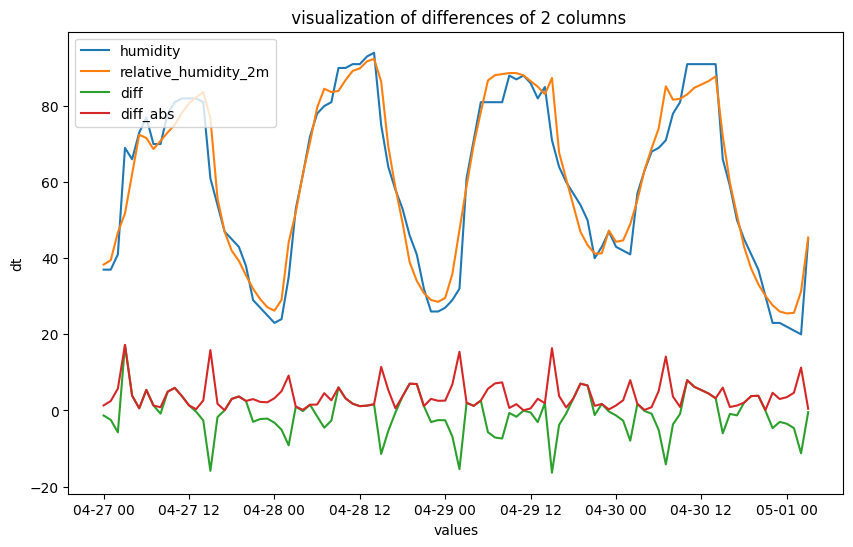

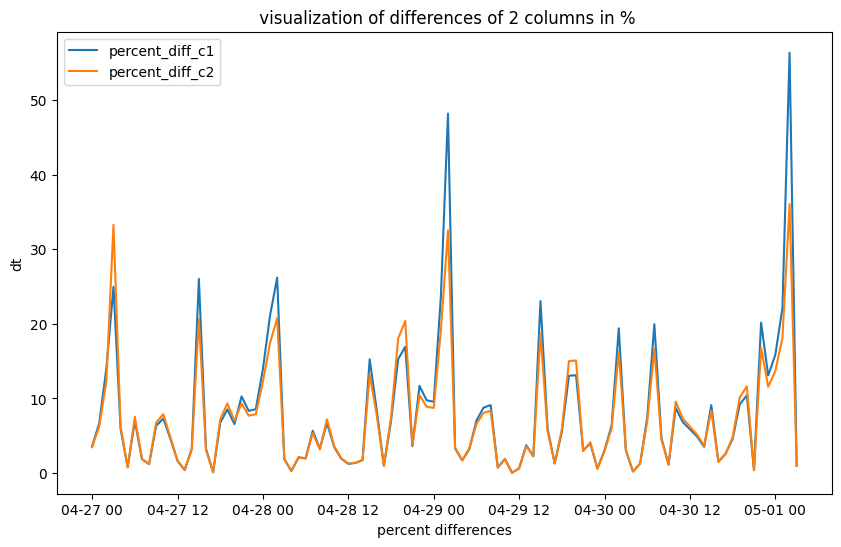

,dt,humidity,relative_humidity_2m,diff,diff_abs,percent_diff_c1,percent_diff_c2
0,1.177632e+09,37,38.328930,-1.328930,1.328930,3.591702,3.467172
1,1.177636e+09,37,39.479202,-2.479202,2.479202,6.700547,6.279768
2,1.177639e+09,41,46.747684,-5.747684,5.747684,14.018743,12.295121
3,1.177643e+09,69,51.777573,17.222427,17.222427,24.960040,33.262331
4,1.177646e+09,66,62.100098,3.899902,3.899902,5.908943,6.280026
...,...,...,...,...,...,...,...
95,1.177974e+09,23,26.009806,-3.009806,3.009806,13.086112,11.571811
96,1.177978e+09,22,25.488014,-3.488014,3.488014,15.854610,13.684919
97,1.177981e+09,21,25.646927,-4.646927,4.646927,22.128223,18.118845
98,1.177985e+09,20,31.267643,-11.267643,11.267643,56.338215,36.036112


In [10]:
utils.df_vis_diff(df = merged_df, column1 = 'humidity', column2 = 'relative_humidity_2m')

diff_abs mean: 0.378997802734375
diff_abs variance: 0.07945679628638307
percent_diff_c1 mean: 0.037347048478634653
percent_diff_c1 variance: 0.0007739884084144048
percent_diff_c2 mean: 0.03733084743442006
percent_diff_c2 variance: 0.0007724305711339173


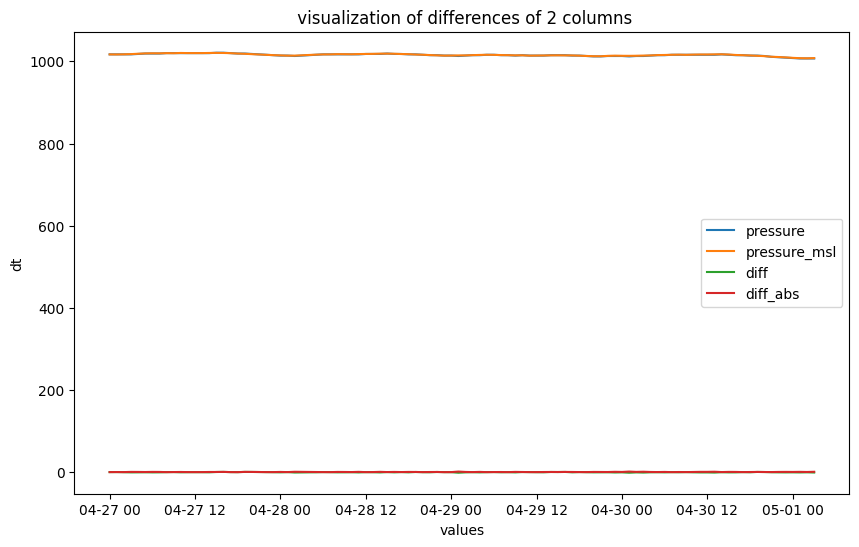

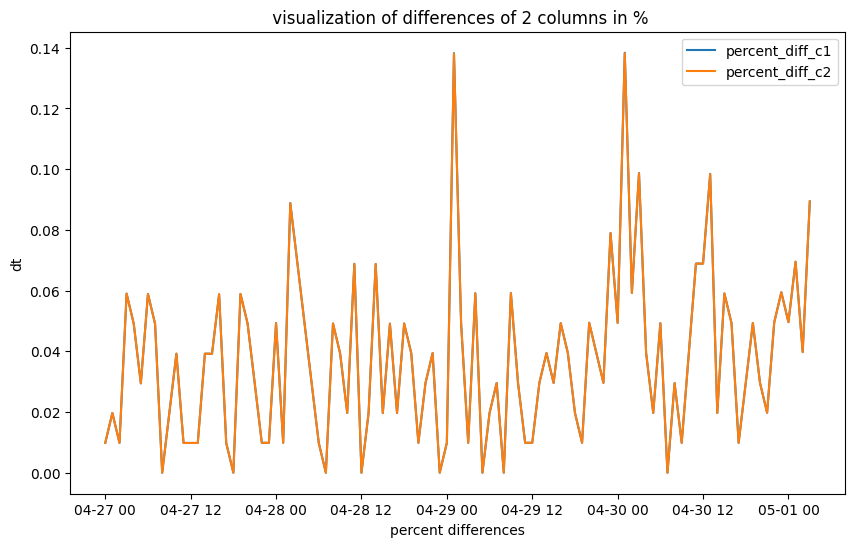

,dt,pressure,pressure_msl,diff,diff_abs,percent_diff_c1,percent_diff_c2
0,1.177632e+09,1017,1016.900024,0.099976,0.099976,0.009830,0.009831
1,1.177636e+09,1017,1016.799988,0.200012,0.200012,0.019667,0.019671
2,1.177639e+09,1017,1017.099976,-0.099976,0.099976,0.009830,0.009829
3,1.177643e+09,1017,1017.599976,-0.599976,0.599976,0.058995,0.058960
4,1.177646e+09,1018,1018.500000,-0.500000,0.500000,0.049116,0.049092
...,...,...,...,...,...,...,...
95,1.177974e+09,1009,1009.599976,-0.599976,0.599976,0.059462,0.059427
96,1.177978e+09,1008,1008.500000,-0.500000,0.500000,0.049603,0.049579
97,1.177981e+09,1007,1007.700012,-0.700012,0.700012,0.069515,0.069466
98,1.177985e+09,1007,1007.400024,-0.400024,0.400024,0.039724,0.039709


In [11]:
utils.df_vis_diff(df = merged_df, column1 = 'pressure', column2 = 'pressure_msl')